<a href="https://colab.research.google.com/github/ArhanWR/Pengolahan-Citra-dan-Visi-Komputer/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

**Kelompok 9**

**Nama Anggota :**

**1. Abdullah Khafabi / 2041720050**

**7. Alfan Farchi Al-Hadi / 2141720084**

**10. Arhan Windu Rizki Putra Budianto / 2141720227**

In [26]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [50]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import math
import matplotlib.pyplot as plt
import glob

**1. Buat Gamma Correction sesuai dengan petunjuk berikut**

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


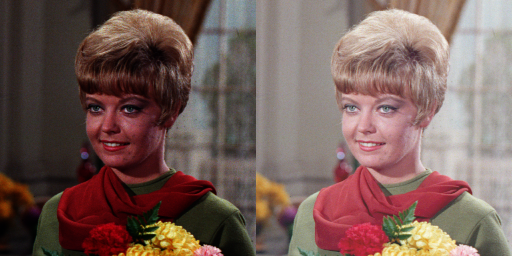

In [8]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

gamma_corrected = 255 * np.power(original / 255.0, 1 / gamma)
gamma_corrected = gamma_corrected.clip(0, 255).astype(np.uint8)

final_frame = cv.hconcat((original, gamma_corrected))
cv2_imshow(final_frame)

**2. Buat Simulasi Image Depth**

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27
 = 128, dst.

 Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.


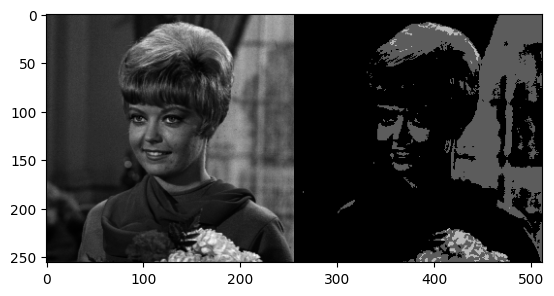

In [61]:
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

# Membuat depth image dengan bit depth 2
depth_image = np.zeros(original.shape, original.dtype)

# Akses per piksel dan hitung citra kedalaman
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i][j] = int(original[i][j] / level) * level

combined_image = np.hstack((original, depth_image))

plt.imshow(combined_image, cmap='gray')
plt.show()

**3. Buat modul Average Denoising**

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).
- cv_img = []
- for img in glob.glob('/content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/noises/*.jpg'):
 - n= cv.imread(img)
 - cv_img.append(n)

Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut
menggunakan cv_img[0], cv_img[1], dst.


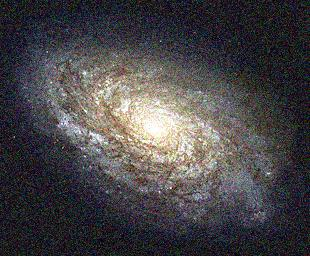

In [62]:
# Baca citra asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Baca 100 citra dengan Gaussian Noise
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Mengaplikasikan average denoising ke gambar
dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

In [63]:
import math

def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)

PSNR
------------------------------
Masukan jumlah citra average: 5
Nilai PSNR: 
28.343388811371124


In [64]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

Nilai PSNR adalah 27.537714129748345 (dB)


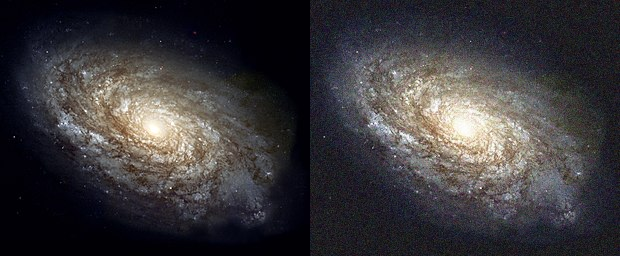

In [65]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.53091520868454 (dB)


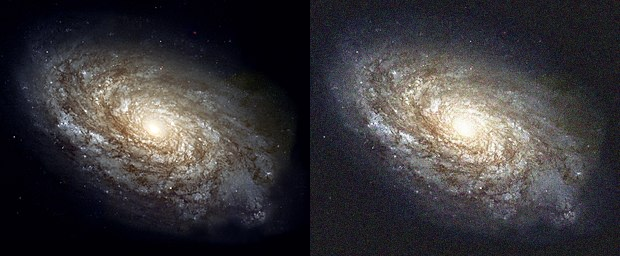

In [66]:
# Citra Average 5
dst = cv_img[0]
noise_number = 5
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.552575709471924 (dB)


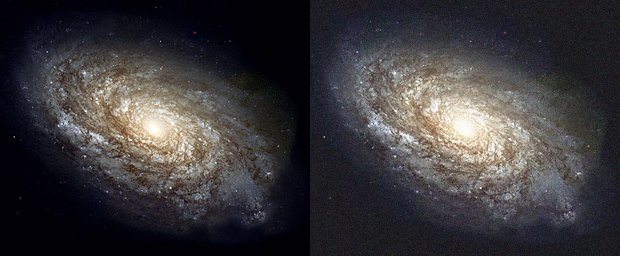

In [67]:
# Citra Average 10
dst = cv_img[0]
noise_number = 10
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.535935896255964 (dB)


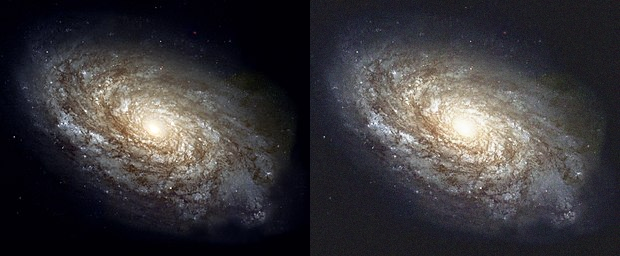

In [68]:
# Citra Average 20
dst = cv_img[0]
noise_number = 20
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.49546627748312 (dB)


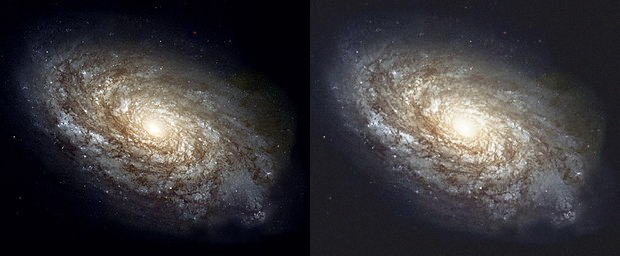

In [69]:
# Citra Average 40
dst = cv_img[0]
noise_number = 40
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.51478665686827 (dB)


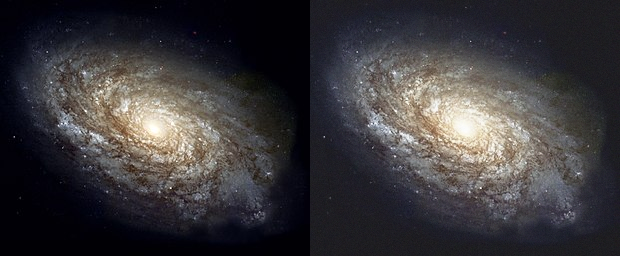

In [70]:
# Citra Average 80
dst = cv_img[0]
noise_number = 80
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.518607771507703 (dB)


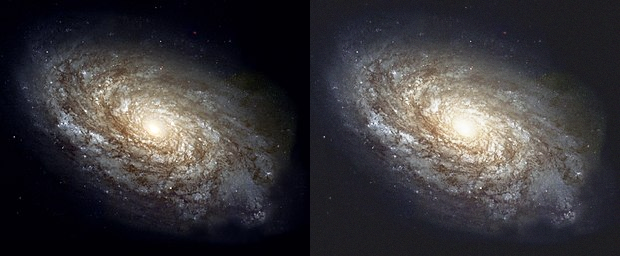

In [71]:
# Citra Average 100
dst = cv_img[0]
noise_number = 100
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah.

**Jawaban:**

Dari hasil diatas, PNSRnya masing-masing:
- **5:** 27.53091520868454 (dB)
- **10:** 27.552575709471924 (dB)
- **20:** 27.535935896255964 (dB)
- **40:** 27.49546627748312 (dB)
- **80:** 27.51478665686827 (dB)
- **100:** 27.518607771507703 (dB)

Dari situ bisa terlihat bahwa hasil PSNR untuk 10 sampai 20 memiliki hasil tertinggi pertama dan kedua, sedangkan nilai dengan citra rendah seperti 5 dan citra tinggi seperti 40, 80, dan 100 memiliki nilai PSNR tidak beraturan tetapi nilai citra tersebut memiliki nilai yang lebih rendah daripada citra 10 dan 20.

Terbukti nilai citra 10 adalah nilai citra yang memiliki nilai PSNR tertinggi dan juga disusul nilai citra 20 dengan nilai tertinggi kedua sedangkan nilai citra sebelum 10 yaitu 5 memiliki nilai PSNR yang lebih rendah daripada 10 dan nilai citra seterusnya yaitu 40 justru memiliki nilai PSNR yang terendah daripada nilai citra sebelumnya (20) dan sesudahnya (80).

**4. Buat image masking untuk image berikut.** Image kiri adalah image asli (image KTP),
sedangkan image paling kanan adalah hasilnya

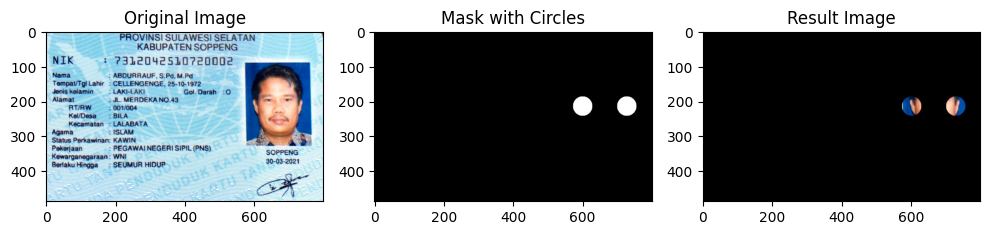

In [80]:
#Kelompok 9

img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')

mask = np.zeros_like(img)

center_coordinates1 = (600, 215)
radius1 = 28
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (727, 215)
radius2 = 28
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates2, radius2, color, thickness)

result = cv.bitwise_and(img, mask)
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

**5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.**
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.


**NOT (Komplemen)**

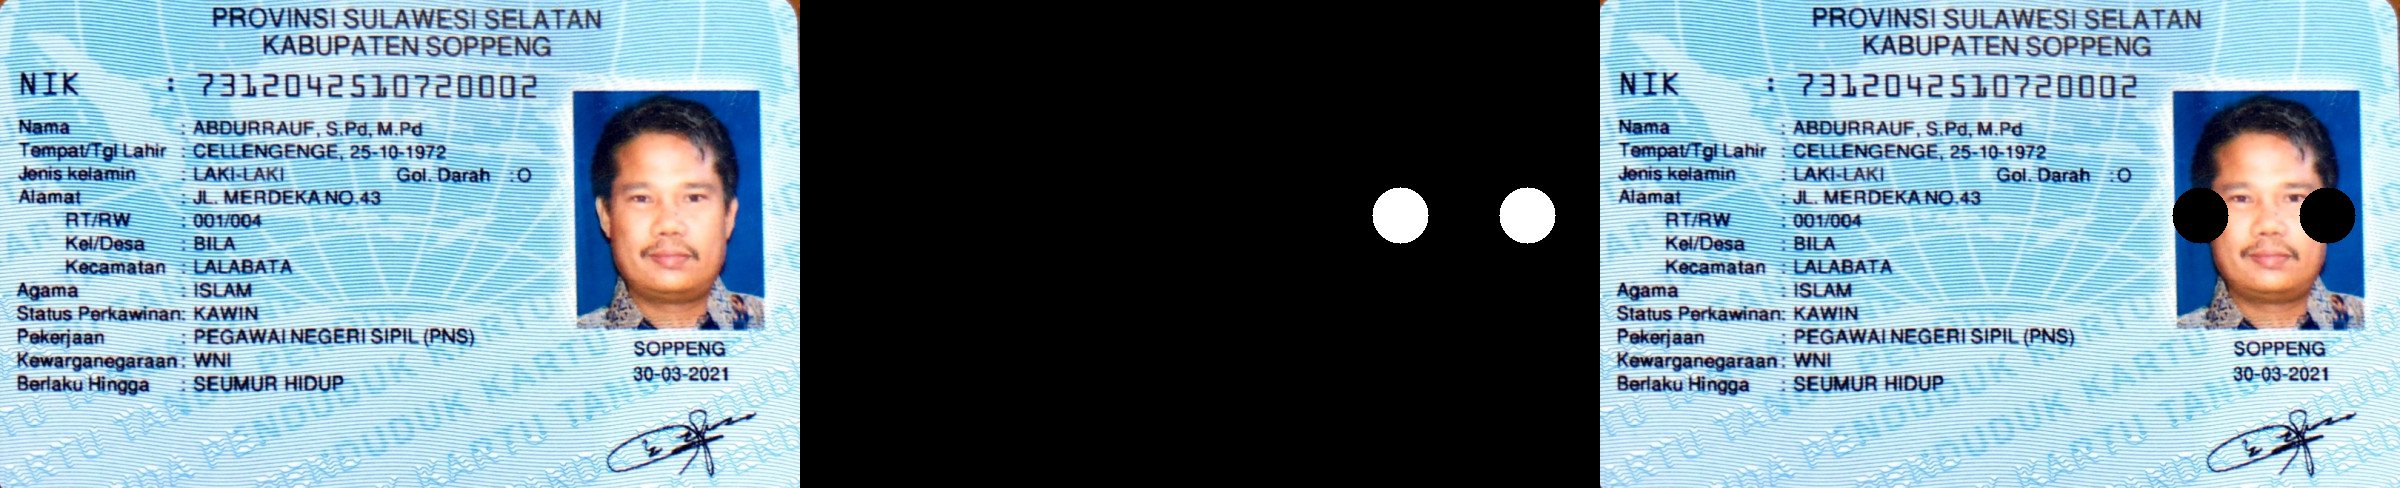

In [81]:
not_mask = cv.bitwise_not(mask)

# Apply the NOT masks to the original image using the bitwise AND operator
result_not = cv.bitwise_and(img , not_mask)

cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.cvtColor(mask, cv.COLOR_BGR2RGB)
cv.cvtColor(result_not, cv.COLOR_BGR2RGB)

# Concatenate the original image and result images
not_image = cv.hconcat([img, mask, result_not])

# Display image
cv2_imshow(not_image)
cv.waitKey(0)
cv.destroyAllWindows()

**OR (Atau)**

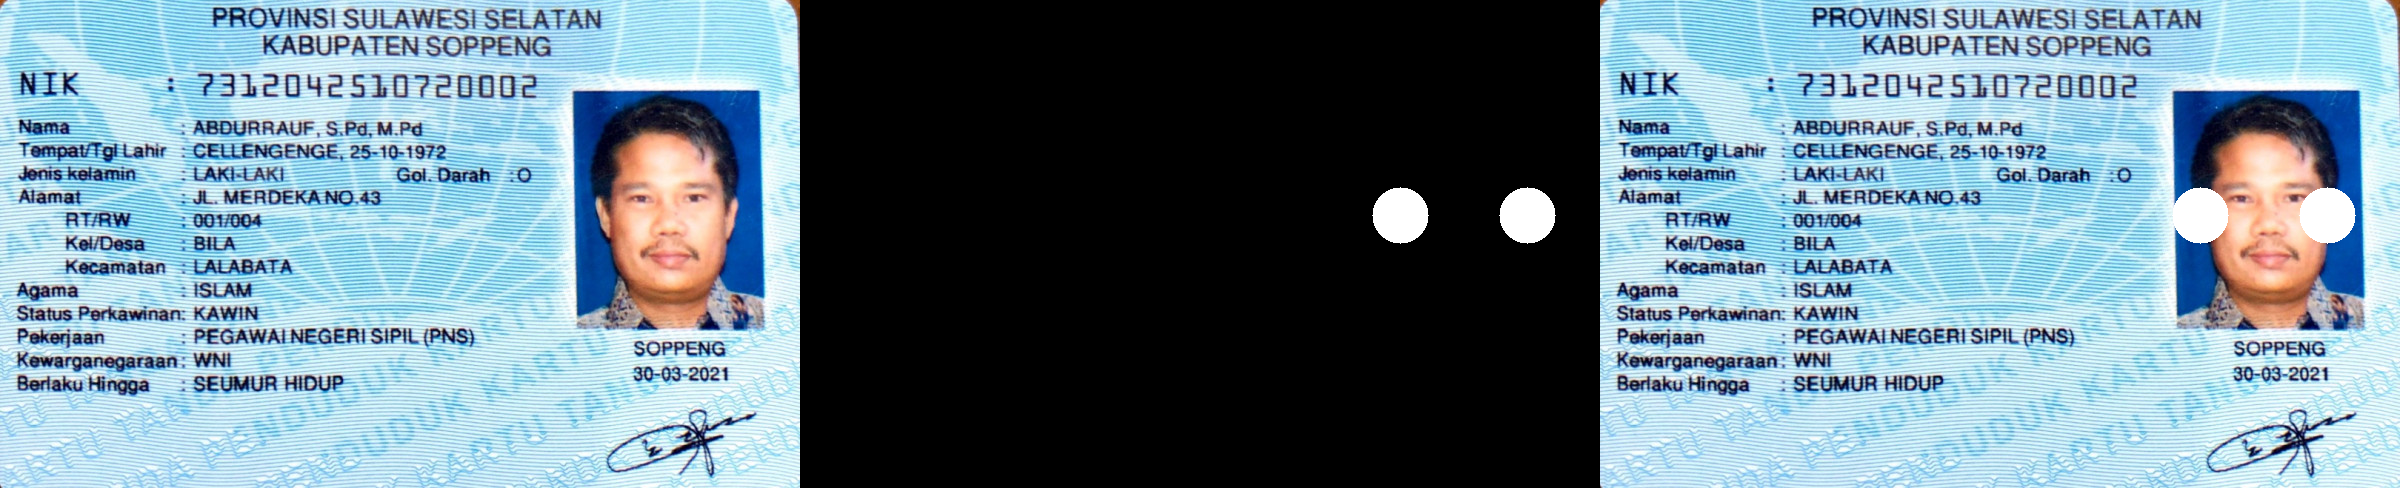

In [82]:
# Combine the masks using the bitwise OR operator
combine_or = cv.bitwise_or(img, mask)

# Apply the combined mask using the bitwise OR operator
result_or = cv.bitwise_or(img, combine_or)

cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.cvtColor(mask, cv.COLOR_BGR2RGB)
cv.cvtColor(result_or, cv.COLOR_BGR2RGB)

# Concatenate the original image and result image horizontally
or_image = cv.hconcat([img, mask, result_or])

# Display the concatenated image
cv2_imshow(or_image)
cv.waitKey(0)
cv.destroyAllWindows()

**AND (Dan)**

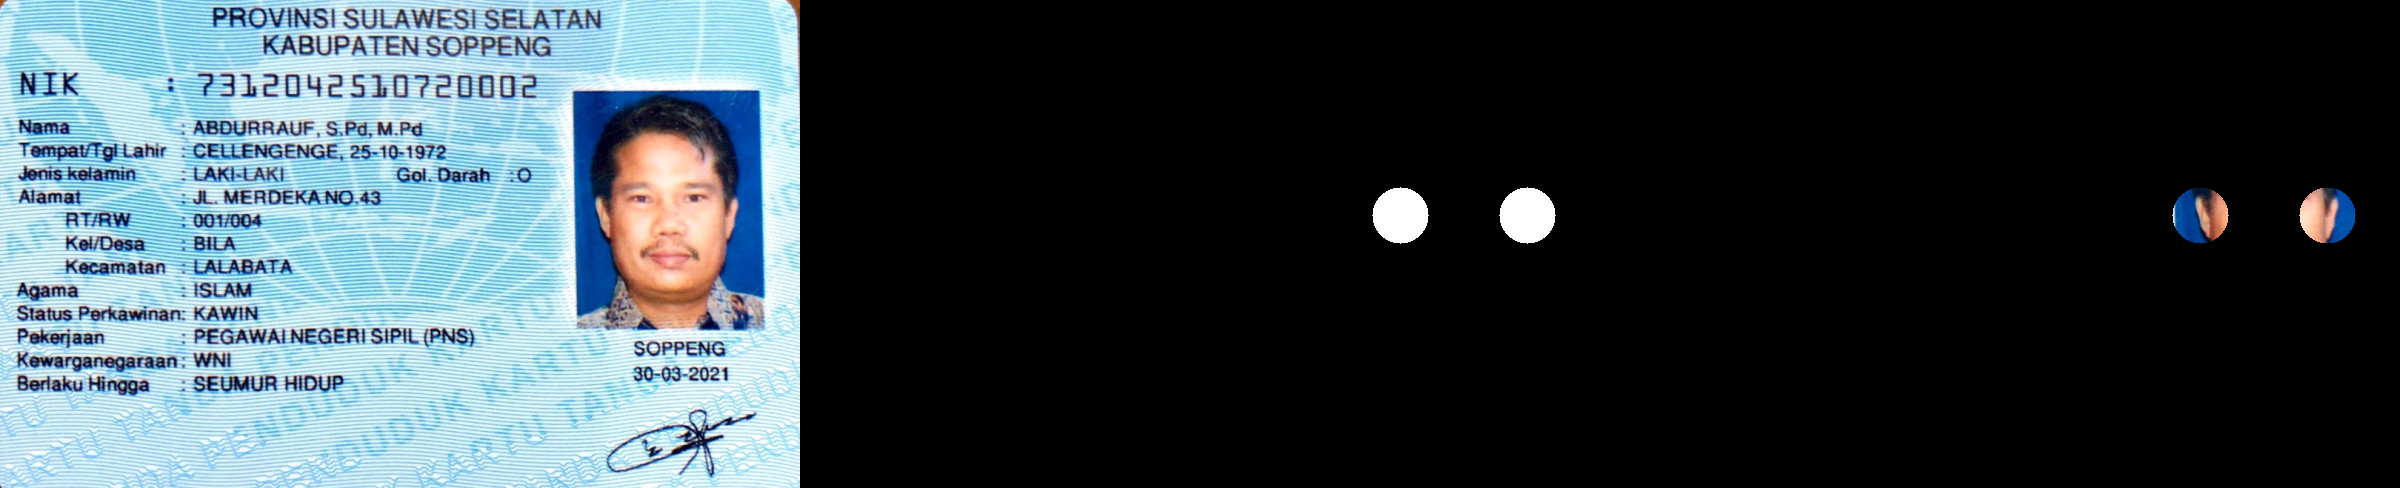

In [85]:
# Combine the masks using the bitwise AND operator
combine_and = cv.bitwise_and(img, mask)

# Apply the combined mask using the bitwise AND operator
result_and = cv.bitwise_and(img, combine_and)

# Concatenate the original image, mask, and result image horizontally
and_image = cv.hconcat([img, mask, result_and])

# Display the concatenated image
cv2_imshow(and_image)
cv.waitKey(0)
cv.destroyAllWindows()

**NAND (Not And)**

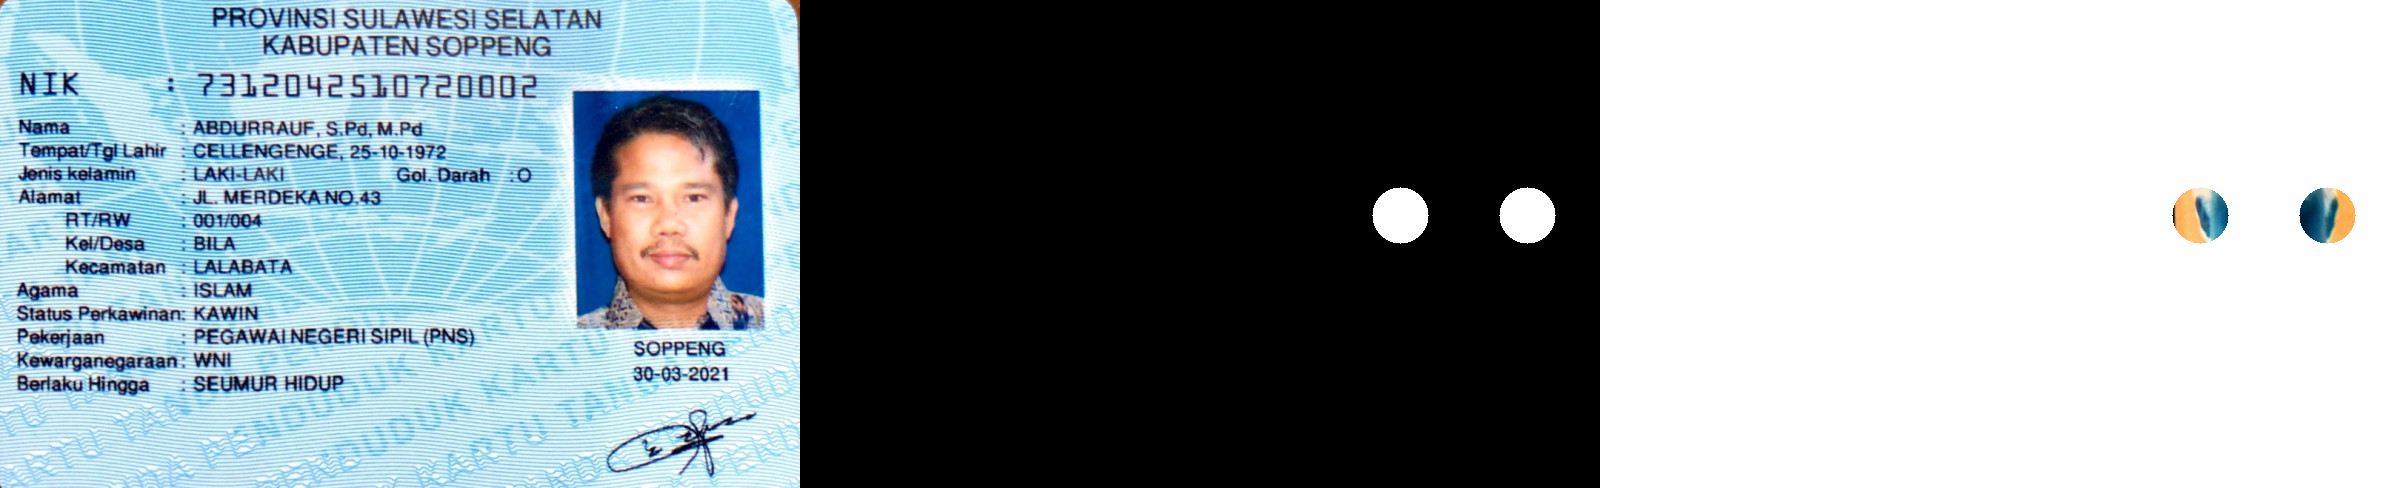

In [83]:
# Perform the NAND operation on the masks
nand_mask = cv.bitwise_not(cv.bitwise_and(img, mask))

# Concatenate the original image and result image
nand_image = cv.hconcat([img, mask, nand_mask])

# Display image
cv2_imshow(nand_image)
cv.waitKey(0)
cv.destroyAllWindows()

**XOR (Exclusive Or)**

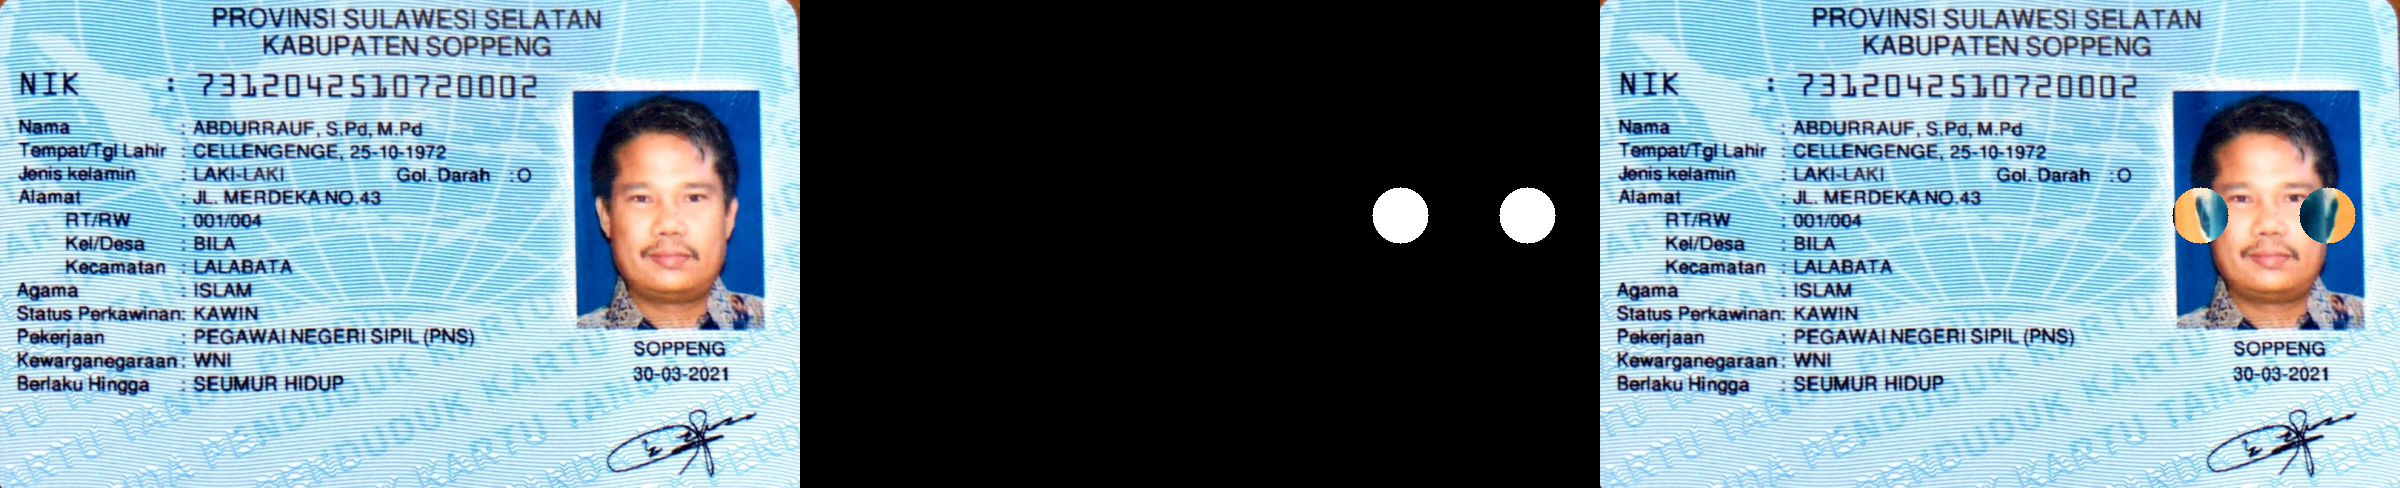

In [84]:
# Apply the XOR mask to the original image using the bitwise XOR operator
result_xor = cv.bitwise_xor(img, mask)

# Concatenate the original image and result image
xor_image = cv.hconcat([img, mask, result_xor])

# Display image
cv2_imshow(xor_image)
cv.waitKey(0)
cv.destroyAllWindows()

Tuliskan hasil analisa anda:

**1. NOT (Negasi)**

Operator NOT mengubah setiap bit dalam citra menjadi kebalikannya. Jika sebuah piksel pada citra asli memiliki nilai 1, operasi NOT akan mengubahnya menjadi 0, dan sebaliknya.
Dalam citra biner, NOT akan menghasilkan efek negatif (invers) pada citra.

Dan disini terlihat di citra bahwa telinganya menjadi hitam tidak berwarna (0)

**2. OR (Disjungsi)**

Operator OR digunakan untuk menggabungkan dua citra atau piksel. Hasil operasi OR adalah citra yang memiliki nilai piksel 1 jika salah satu atau kedua piksel asli memiliki nilai 1.
Operasi OR digunakan dalam operasi segmentasi dan pemaduan citra.

Dan disini terlihat di citra bahwa telinganya menjadi putih karena pada mask terdapat nilai 1 (putih) jadi citra juga memilih putih tersebut.

**3. AND (Konjungsi)**

Operator AND digunakan untuk menggabungkan dua citra atau piksel. Hasil operasi AND adalah citra yang memiliki nilai piksel 1 hanya jika kedua piksel asli memiliki nilai 1.
Operasi AND digunakan untuk isolasi objek dalam citra, dan digunakan dalam operasi pemrosesan citra biner.

Dan disini terlihat di citra bahwa selain telinga yang bernilai 1, yang lainnya bernilai 0. Jadi dicitra hanya ditampilkan telinganya saja karena sama-sama bernilai 1 di citra dan masknya.

**4. NAND (NOT-AND)**

Operator NAND adalah kebalikan dari operasi AND. Hasil operasi NAND adalah citra yang memiliki nilai piksel 1 jika salah satu atau kedua piksel asli memiliki nilai 0.
Digunakan dalam operasi segmentasi, penggabungan, dan pemrosesan citra biner.

Dan disini terlihat di citra bahwa selain telinga yang berwarna invers semua karena di citra asli dan mask telingnya sama-sama bernilai 1, sedangkan itu di citra asli semua bernilai 1 atau putih dan di mask semua selain telinga bernilai 0.

**5. XOR (OR eksklusif)**

Operator XOR (OR eksklusif) menghasilkan citra yang memiliki nilai piksel 1 jika hanya satu dari dua piksel asli memiliki nilai 1, tetapi bukan keduanya.
Digunakan dalam berbagai operasi pemrosesan citra, termasuk deteksi perbedaan antara dua citra.

Dan disini terlihat di citra bahwa selain telinga yang memiliki warna invers karena di citra asli dan masknya telinga tersebut bernilai 1, sedangkan di citra asli semua bernilai 1 dan di mask semua selain telinga bernilai 0.